Analysis of 2016 United States Presidential election contributions made in 2015.  Data obtained from United States Federal Election Commission webpage.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('2016Election/2016Elect.csv', index_col=False, parse_dates=True)

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
#Columns to keep for analysis
colsKeep = ['cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
           'contb_receipt_amt', 'contb_receipt_dt']

In [4]:
df.contb_receipt_dt = pd.to_datetime(df.contb_receipt_dt, format='%d-%b-%y')

In [5]:
df = df[colsKeep]
df['month'] = df.contb_receipt_dt.apply(lambda x: x.month)
df['year'] = df.contb_receipt_dt.apply(lambda x: x.year)

In [6]:
#restrict to contributions in 2015
df = df[(df.year == 2015) & (df.contb_receipt_amt>0)]

In [7]:
df.cand_nm.unique()

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Lessig, Lawrence'], dtype=object)

In [8]:
#Reformat names of candidates
name_map = {'Rubio, Marco':'Marco Rubio', 'Santorum, Richard J.':'Rick Santorum', 'Perry, James R. (Rick)':'Rick Perry', 
           'Carson, Benjamin S.': 'Ben Carson', "Cruz, Rafael Edward 'Ted'": 'Ted Cruz', 'Paul, Rand':'Rand Paul',
           'Clinton, Hillary Rodham': 'Hillary Clinton', 'Sanders, Bernard': 'Bernie Sanders', 'Fiorina, Carly': 'Carly Fiorina',
           'Huckabee, Mike': 'Mike Huckabee', 'Pataki, George E.': 'George Pataki',  "O'Malley, Martin Joseph": "Martin O'Malley",
           'Graham, Lindsey O.': 'Lindsey Graham', 'Bush, Jeb': 'Jeb Bush', 'Trump, Donald J.': 'Donald Trump', 'Jindal, Bobby': 'Bobby Jindal',
           'Christie, Christopher J.':'Chris Christie', 'Walker, Scott': 'Scott Walker', 'Stein, Jill': 'Jill Stein', 
           'Webb, James Henry Jr.':'Jim Webb', 'Kasich, John R.':'John Kasich', 'Lessig, Lawrence':'Lawrence Lessig'}
df.cand_nm = df.cand_nm.map(name_map)
df.tail()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,month,year
887279,Lawrence Lessig,"CATES, ROBERT",MONROE,WI,535663645,MONROE CLINIC,PHYSICIAN,500,2015-09-05,9,2015
887280,Lawrence Lessig,"GESSNER, JASON",MILWAUKEE,WI,532072270,GOOGLE,SOFTWARE ENGINEER,250,2015-09-04,9,2015
887281,Lawrence Lessig,"KLANN, DAVID",VIROQUA,WI,546650146,SELF-EMPLOYED,SMALL BUSINESS OWNER,250,2015-08-11,8,2015
887282,Lawrence Lessig,"DAVIS, DEVRA",TETON VILLAGE,WY,830250058,ENVIRONMENTAL HEALTH TRUST,SCIENTIST/WRITER,500,2015-08-11,8,2015
887283,Lawrence Lessig,"KVENILD, CASSANDRA",LARAMIE,WY,820725035,UNIVERSITY OF WYOMING,LIBRARIAN,250,2015-08-13,8,2015


In [9]:
#Assign political parties to candidates.
parties={'Marco Rubio':'Republican', 'Rick Santorum':'Republican', 'Rick Perry':'Republican', 
           'Ben Carson': 'Republican', "Ted Cruz": 'Republican', 'Rand Paul':'Republican',
           'Hillary Clinton': 'Democratic', 'Bernie Sanders': 'Democratic', 'Carly Fiorina': 'Republican',
           'Mike Huckabee': 'Republican', 'George Pataki': 'Republican',  "Martin O'Malley": "Democratic",
           'Lindsey Graham': 'Republican', 'Jeb Bush': 'Republican', 'Donald Trump': 'Republican', 'Bobby Jindal': 'Republican',
           'Chris Christie':'Republican', 'Scott Walker': 'Republican', 'Jill Stein': 'Democratic', 
           'Jim Webb':'Democratic', 'John Kasich':'Republican', 'Lawrence Lessig':'Democratic'}
df['party'] = df.cand_nm.map(parties)

In [10]:
df.party.value_counts()

Republican    472502
Democratic    402079
dtype: int64

In [11]:
#Clean up occupation column data
occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
'C.E.O.': 'CEO',
'SELF-EMPLOYED': 'SELF EMPLOYED',
'NONE': 'NOT EMPLOYED'    
}
f = lambda x: occ_mapping.get(x, x)
df.contbr_occupation = df.contbr_occupation.map(f)
df.contbr_occupation.value_counts()

RETIRED                                   223908
NOT EMPLOYED                               76683
NOT PROVIDED                               37770
ATTORNEY                                   23923
HOMEMAKER                                  20465
PHYSICIAN                                  16004
ENGINEER                                   10523
CONSULTANT                                 10313
TEACHER                                     9648
SALES                                       7489
SELF EMPLOYED                               6985
PROFESSOR                                   6884
CEO                                         6528
PRESIDENT                                   6512
LAWYER                                      5930
OWNER                                       5654
MANAGER                                     5537
SOFTWARE ENGINEER                           4883
EXECUTIVE                                   4702
BUSINESS OWNER                              4086
STUDENT             

In [12]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
'NONE': 'NOT EMPLOYED',
'UNEMPLOYED': 'NOT EMPLOYED',
'MR.': 'NOT EMPLOYED',
'MS.': 'NOT EMPLOYED',
'REFUSED': 'NOT PROVIDED'
}
f = lambda x: emp_mapping.get(x, x)
df.contbr_employer = df.contbr_employer.map(f)
df.contbr_employer.value_counts().head(10)

RETIRED                200511
SELF-EMPLOYED          105720
NOT EMPLOYED            92818
NOT PROVIDED            40554
HOMEMAKER               14511
HILLARY FOR AMERICA      1289
USPS                      728
STUDENT                   705
GOOGLE                    601
IBM                       578
dtype: int64

In [13]:
generic = ['RETIRED', 'SELF-EMPLOYED', 'NOT EMPLOYED', 'NOT PROVIDED', 'HOMEMAKER', 'STUDENT']

In [14]:
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df.month = df.month.map(month_map)
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,month,year,party
0,Marco Rubio,"HEFFERNAN, MICHAEL",APO,AE,9096,RETIRED,RETIRED,225,2015-10-29,Oct,2015,Republican
1,Marco Rubio,"HEFFERNAN, MICHAEL",APO,AE,90960009,NOT PROVIDED,NOT PROVIDED,210,2015-06-27,Jun,2015,Republican
2,Marco Rubio,"DOHERTY, THERESA",APO,AE,97520002,DODEA/DS,TEACHER,500,2015-06-26,Jun,2015,Republican
3,Marco Rubio,"KIBBLE, KUMAR",DPO,AE,92131903,U.S. DEPARTMENT OF HOMELAND SECURITY,LAW ENFORCEMENT,500,2015-08-27,Aug,2015,Republican
4,Marco Rubio,"VERHAGEN, JOSH",NENANA,AK,997600113,U.B.I,CARPENTER,25,2015-11-18,Nov,2015,Republican


In [15]:
def cand_ts(candidate, prop=False):
    #Construct time series plot for individual candidate
    cand = df[df.cand_nm == candidate]
    group = cand.groupby('month').agg(sum)['contb_receipt_amt']
    monthList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
    if prop:
        group = group.div(group.max())
    group.ix[monthList].plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel('$')

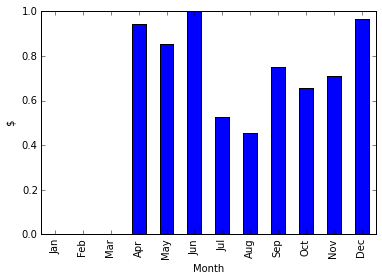

In [16]:
cand_ts('Hillary Clinton', True)

In [17]:
def cand_empl(candidate):
    #Top 10 contributing companies to a particular candidate
    cand = df[df.cand_nm == candidate]
    cand = cand[~ cand.contbr_employer.isin(generic)]
    group = cand.groupby('contbr_employer').agg(sum)['contb_receipt_amt']
    group.order(ascending=False).head(10).plot(kind='bar')

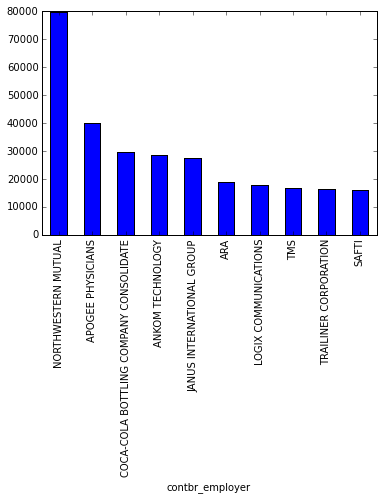

In [18]:
cand_empl('Ben Carson')

In [19]:
total_cont = df.groupby('cand_nm').agg(sum)['contb_receipt_amt']
order_by_cont = total_cont.order(ascending=False)
top_cont_idx = order_by_cont.index
order_by_cont

cand_nm
Hillary Clinton    95041591.390000
Ted Cruz           34124229.580000
Jeb Bush           31447355.250000
Marco Rubio        27078535.400000
Ben Carson         23408282.720000
Bernie Sanders     19387995.099999
Chris Christie      6940518.130000
John Kasich         6619153.770000
Carly Fiorina       6348970.180000
Scott Walker        5696339.960000
Rand Paul           5125928.400000
Lindsey Graham      4114956.420000
Martin O'Malley     3746967.380000
Mike Huckabee       2362735.150000
Donald Trump        1695343.290000
Bobby Jindal        1275393.160000
Rick Perry          1189868.230000
Rick Santorum       1016606.030000
Lawrence Lessig      624219.500000
George Pataki        480990.980000
Jim Webb             347006.410000
Jill Stein            80942.000000
Name: contb_receipt_amt, dtype: float64

In [20]:
#count number of unique contributors by candidate
num_cont = df.groupby('cand_nm')['contbr_nm'].agg(lambda x: np.size(np.unique(x.values)))
order_num_cont = num_cont.order(ascending=False)                                     

In [21]:
order_num_cont

cand_nm
Hillary Clinton    66845
Bernie Sanders     59488
Ben Carson         47658
Ted Cruz           46839
Marco Rubio        21630
Jeb Bush           16291
Rand Paul           9071
Carly Fiorina       8736
Scott Walker        4628
John Kasich         4319
Chris Christie      3640
Donald Trump        3166
Martin O'Malley     2846
Mike Huckabee       2440
Lindsey Graham      2102
Rick Santorum        801
Rick Perry           746
Lawrence Lessig      725
Bobby Jindal         666
Jim Webb             481
George Pataki        307
Jill Stein           225
Name: contbr_nm, dtype: int64

In [22]:
by_cont_num = order_num_cont[top_cont_idx]
cand_by_avg_cont = order_by_cont/by_cont_num
cand_by_avg_cont.order(ascending=False)

cand_nm
Lindsey Graham     1957.638639
Jeb Bush           1930.351436
Bobby Jindal       1915.004745
Chris Christie     1906.735750
Rick Perry         1594.997627
George Pataki      1566.745863
John Kasich        1532.566282
Hillary Clinton    1421.820501
Martin O'Malley    1316.573219
Rick Santorum      1269.171074
Marco Rubio        1251.897152
Scott Walker       1230.842688
Mike Huckabee       968.334078
Lawrence Lessig     860.992414
Ted Cruz            728.543085
Carly Fiorina       726.759407
Jim Webb            721.427048
Rand Paul           565.089670
Donald Trump        535.484299
Ben Carson          491.172158
Jill Stein          359.742222
Bernie Sanders      325.914388
dtype: float64

In [23]:
#Median contribution amount by candidate
by_median = df.groupby('cand_nm')['contb_receipt_amt'].agg(np.median)
by_median.order(ascending=False)

cand_nm
Bobby Jindal       2700.00
Chris Christie     1350.00
John Kasich        1000.00
George Pataki      1000.00
Rick Perry         1000.00
Jeb Bush           1000.00
Martin O'Malley     500.00
Scott Walker        500.00
Lindsey Graham      500.00
Jim Webb            250.00
Rick Santorum       250.00
Lawrence Lessig     250.00
Donald Trump        244.08
Jill Stein          150.00
Carly Fiorina       100.00
Marco Rubio         100.00
Mike Huckabee       100.00
Hillary Clinton     100.00
Ted Cruz             50.00
Rand Paul            50.00
Ben Carson           50.00
Bernie Sanders       35.00
Name: contb_receipt_amt, dtype: float64

In [24]:
df.contb_receipt_amt.max()

1797624.94

In [25]:
def cand_city(candidate):
    #Top 10 contributions to a candidate ordered by city of residence of donor
    cand = df[df.cand_nm == candidate]
    city = cand.groupby('contbr_city')['contb_receipt_amt'].agg(sum)
    city.order(ascending=False).head(10).plot(kind='bar')

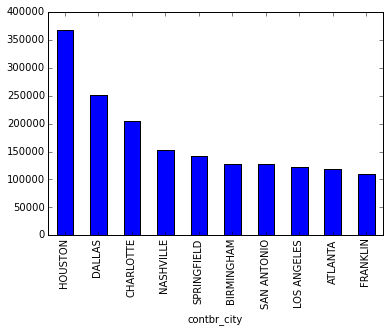

In [26]:
cand_city('Ben Carson')

In [27]:
bernie = df[df.cand_nm == 'Bernie Sanders']
bernie_city = bernie.groupby('contbr_city')['contb_receipt_amt'].agg(sum)
sort_bernie = bernie_city.order(ascending=False)
div_bernie = sort_bernie.div(sort_bernie.sum())
#div_bernie.cumsum().head(25)
div_bernie.cumsum().searchsorted(0.5)[0]

196

In [28]:
def cand_breadth(candidate):
    #Number of cities of donor residences it takes to reach 0.50 of candidates' total donor contributions
    cand = df[df.cand_nm == candidate]
    group = cand.groupby('contbr_city')['contb_receipt_amt'].agg(sum)
    sort = group.order(ascending=False)
    div_cand = sort.div(sort.sum())
    print div_cand.cumsum().head(20)
    print ''
    print 'It take %d cities to reach 0.50 of the candidate support for %s.' %(div_cand.cumsum().searchsorted(0.5)[0], candidate)

In [29]:
def cand_50(candidate, factor, prop):
    cand = df[df.cand_nm == candidate]
    group = cand.groupby(factor)['contb_receipt_amt'].agg(sum)
    sort = group.order(ascending=False)
    div_cand = sort.div(sort.sum())
    return div_cand.cumsum().searchsorted(prop)[0]

In [30]:
cand_num = []
prop = 0.50
for candidate in df.cand_nm.unique():
    cand_num.append((candidate, cand_50(candidate, 'contbr_city', prop)))
sorted_cand = sorted(cand_num, key=lambda cand: cand[1], reverse=True)
for c in sorted_cand:
    print "It takes %d cities to reach %0.2f support for %s." %(c[1], prop, c[0])

It takes 361 cities to reach 0.50 support for Ben Carson.
It takes 196 cities to reach 0.50 support for Bernie Sanders.
It takes 181 cities to reach 0.50 support for Rand Paul.
It takes 150 cities to reach 0.50 support for Carly Fiorina.
It takes 139 cities to reach 0.50 support for Donald Trump.
It takes 93 cities to reach 0.50 support for Ted Cruz.
It takes 90 cities to reach 0.50 support for Marco Rubio.
It takes 76 cities to reach 0.50 support for Chris Christie.
It takes 76 cities to reach 0.50 support for Scott Walker.
It takes 63 cities to reach 0.50 support for Mike Huckabee.
It takes 57 cities to reach 0.50 support for Jeb Bush.
It takes 47 cities to reach 0.50 support for Hillary Clinton.
It takes 43 cities to reach 0.50 support for John Kasich.
It takes 38 cities to reach 0.50 support for Jim Webb.
It takes 30 cities to reach 0.50 support for Rick Santorum.
It takes 27 cities to reach 0.50 support for Martin O'Malley.
It takes 22 cities to reach 0.50 support for Jill Stein.


In [31]:
df.groupby('party')['contb_receipt_amt'].agg(sum)

party
Democratic    1.192287e+08
Republican    1.589252e+08
Name: contb_receipt_amt, dtype: float64

In [32]:
bins = np.array([0, 10, 100, 250, 1000, 15000])

In [33]:
trim = df[df.contb_receipt_amt<15000]
labels = pd.cut(trim.contb_receipt_amt, bins)

In [34]:
def cand_compare(cand1, cand2):
    cands = trim[trim.cand_nm.isin([cand1, cand2])] #restrict to 2 candidates
    labels = pd.cut(cands.contb_receipt_amt, bins) #create labels for contribution amounts
    group = cands.groupby(['cand_nm', labels])
    bucket_sums = group.contb_receipt_amt.sum().unstack(0)
    normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
    normed_sums.plot(kind='barh', stacked=True)

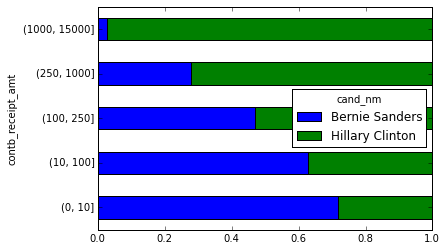

In [35]:
cand_compare('Hillary Clinton', 'Bernie Sanders')

In [36]:
def cand_by_amt(candidate):
    cand = trim[trim.cand_nm == candidate]
    labels = pd.cut(cand.contb_receipt_amt, bins)
    group = cand.groupby(labels)['contb_receipt_amt'].agg(sum)
    group.div(group.sum(axis=0)).plot(kind='bar')

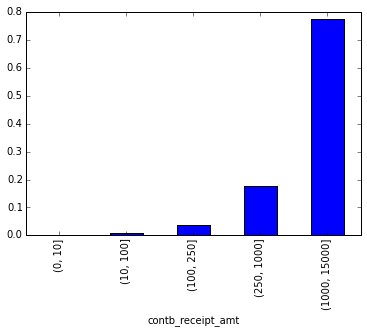

In [37]:
cand_by_amt("John Kasich")

In [38]:
def clean_zip(zipcode):
    try:
        string_zip = str(zipcode)
        return int(string_zip[:5])
    except:
        return zipcode

In [39]:
df.contbr_zip = df.contbr_zip.apply(lambda x: clean_zip(x))

In [40]:
def prop_zip(zipcode):
    #Break down proportion of zipcode's political contributions by candidate
    dfzip = df[df.contbr_zip == zipcode]
    group = dfzip.groupby('cand_nm')['contb_receipt_amt'].agg(sum)
    ordered = group.order(ascending=False).head(10)
    ordered.div(ordered.sum()).plot(kind='bar')

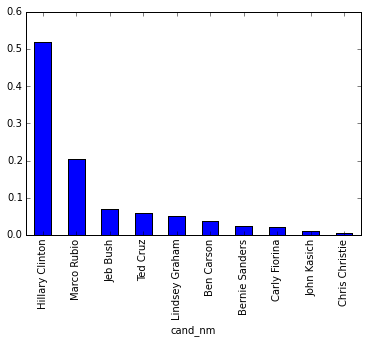

In [41]:
prop_zip(90210)

In [42]:
def prop_state(state):
    #Share of a state's contributions by candidate
    dfstate = df[df.contbr_st == state]
    group = dfstate.groupby('cand_nm')['contb_receipt_amt'].agg(sum)
    ordered = group.order(ascending=False).head(10)
    ordered.div(ordered.sum()).plot(kind='bar')

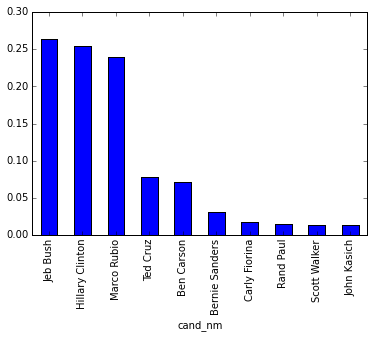

In [43]:
prop_state('FL')

In [44]:
non_generic = df[~ df.contbr_employer.isin(generic)]
by_emp = non_generic.groupby('contbr_employer')['contb_receipt_amt'].agg(sum)
by_emp.order(ascending=False).head(20)

contbr_employer
GOLDMAN SACHS                            518245.58
CIVIC VOLUNTEER                          365811.00
MORGAN STANLEY                           326242.48
MORGAN & MORGAN                          252608.10
GOOGLE                                   242019.84
DLA PIPER LLP                            213950.00
STANFORD UNIVERSITY                      178822.64
PAUL WEISS RIFKIND WHARTON & GARRISON    161400.00
SULLIVAN & CROMWELL LLP                  158945.07
CORNING, INC.                            157400.00
MERRILL LYNCH                            149080.16
WELLS FARGO                              138067.69
GREENBERG TRAURIG LLP                    136442.25
KIRKLAND & ELLIS LLP                     129487.62
AKIN GUMP STRAUSS HAUER & FELD LLP       128915.00
CANTOR FITZGERALD                        121629.55
NORTHWESTERN MUTUAL                      118589.16
LATHAM & WATKINS LLP                     113481.75
BANK OF AMERICA                          109471.86
MICROSOFT      

In [45]:
monthList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
republicans = df[df.party == 'Republican']
republicans = republicans.groupby('month')['contb_receipt_amt'].agg(sum)
republicans = republicans[monthList]
democrats = df[df.party == 'Democratic']
democrats = democrats.groupby('month')['contb_receipt_amt'].agg(sum)
democrats = democrats[monthList]

In [46]:
def market_share(candidates):
    #Share of a political party's contributions by candidate
    fig = plt.figure()
    ax = plt.axes()
    for candidate in candidates:
        cand = df[df.cand_nm == candidate]
        candGroup = cand.groupby('month')['contb_receipt_amt'].agg(sum)
        candGroup = candGroup[monthList]
        party = parties[candidate]
        if party == 'Republican':
            share = candGroup / republicans
            ax.plot(np.arange(1, 13, 1), share.values, label=candidate.split(' ')[0])
        else:
            share = candGroup / democrats
            ax.plot(np.arange(1, 13, 1), share.values, label=candidate.split(' ')[0])
    plt.legend(loc='best')
    plt.xticks(np.arange(1, 13, 1), monthList)

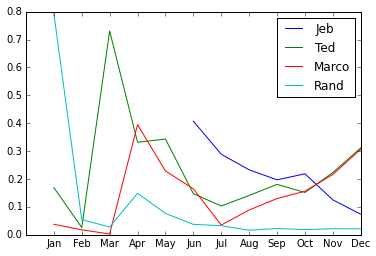

In [47]:
market_share(['Jeb Bush', 'Ted Cruz', 'Marco Rubio', 'Rand Paul'])

In [48]:
state_list = ['IA', 'KS', 'UT', 'VA', 'NC', 'NE', 'SD', 'AL', 'ID', 'DE', 'AK', 'CT', 
          'NM', 'MS', 'CO', 'NJ', 'FL', 'MN', 'NV', 'AZ', 'WI', 'ND', 'PA', 
          'OK', 'KY', 'RI', 'NH', 'MO', 'ME', 'VT', 'GA', 'NY', 'CA', 'HI', 'IL', 'TN', 
          'MA', 'OH', 'MD', 'MI', 'WY', 'WA', 'OR', 'SC', 'IN', 'LA', 'DC', 'MT', 'AR', 'WV', 'TX']
len(state_list)

51

In [49]:
states = df.groupby('contbr_st')['contb_receipt_amt'].agg(sum)
states = states[state_list]
states.order(ascending=False).head(10)

contbr_st
CA    43589173.979999
TX    35503254.140000
NY    31561218.920000
FL    24595630.410000
NJ     9095262.800000
IL     8782929.820000
VA     8411876.100000
MD     7501050.300000
MA     7228235.140000
OH     7102103.650000
Name: contb_receipt_amt, dtype: float64

In [50]:
def state_shares(candidate):
    party = parties[candidate]
    cand = df[(df.cand_nm == candidate)]
    by_st = cand.groupby('contbr_st')['contb_receipt_amt'].agg(sum)
    states = df[df.party==party].groupby('contbr_st')['contb_receipt_amt'].agg(sum)[state_list]
    by_st = by_st[state_list] / states
    order_st = by_st.order(ascending=False).head(10)
    print order_st

In [51]:
state_shares('Marco Rubio')

contbr_st
VT    0.509427
FL    0.316079
MA    0.277620
AZ    0.261469
MT    0.255008
CA    0.250859
NV    0.232334
NY    0.228651
DC    0.222297
IL    0.221102
Name: contb_receipt_amt, dtype: float64


In [52]:
by_state = df.groupby(['party', 'contbr_st'])
state_tot = by_state.contb_receipt_amt.sum().unstack(0).fillna(0)
state_tot = state_tot.loc[state_list]
state_props = state_tot.div(state_tot.sum(axis=1), axis=0)
state_props = state_props.sort('Republican', ascending=False)
state_props.head(10)

party,Democratic,Republican
contbr_st,,
WY,0.111528,0.888472
SC,0.150725,0.849275
TX,0.166927,0.833073
LA,0.167231,0.832769
ND,0.173492,0.826508
MS,0.177449,0.822551
AL,0.188377,0.811623
ID,0.189225,0.810775
OH,0.189456,0.810544


In [53]:
df['day'] = df.contb_receipt_dt.apply(lambda x: x.day)
df['monthNum'] = df.contb_receipt_dt.apply(lambda x: x.month)

In [54]:
def heatmap(candidate):
    cand = df[df.cand_nm == candidate]
    plt.figure(figsize=(10, 10))
    ct = cand.groupby(['monthNum', 'day'])['contb_receipt_amt'].agg(sum).reset_index()
    plt.imshow(np.array(pd.pivot_table(ct, values='contb_receipt_amt', index='monthNum', columns='day')), cmap='RdBu_r')
    plt.xlabel('Day')
    plt.ylabel('Month')
    plt.title('Heatmap for %s' % candidate)
    plt.colorbar()

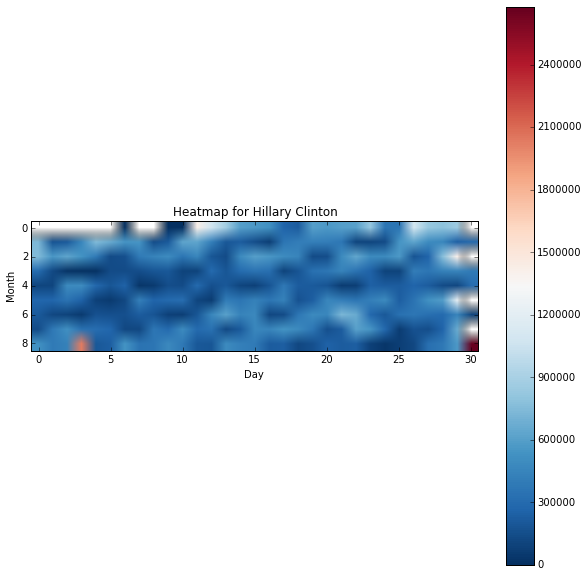

In [55]:
heatmap('Hillary Clinton')

In [56]:
def best_days(candidate):
    hill = df[df.cand_nm == candidate]
    hillg = hill.groupby('contb_receipt_dt')['contb_receipt_amt'].agg(sum)
    print hillg.order(ascending=False).head(10)

In [57]:
best_days('Ted Cruz')

contb_receipt_dt
2015-12-31    1598480.29
2015-03-31    1405862.00
2015-06-30    1169940.66
2015-03-23    1087750.33
2015-09-30    1084707.79
2015-11-30     517628.48
2015-09-29     501476.93
2015-05-05     466980.00
2015-12-30     459811.82
2015-12-28     416006.76
Name: contb_receipt_amt, dtype: float64


In [58]:
def max_donors(candidate):
    #Proportion of a candidate's donations that came from contributors donating the maximum amount
    cand = df[df.cand_nm == candidate]
    totalReceipts = cand.contb_receipt_amt.sum()
    group = cand.groupby('contbr_nm')['contb_receipt_amt'].agg(sum)
    maxed = group[group >=2700].sum()
    return round(maxed/totalReceipts*100, 2)

In [59]:
donor_max = []
for cand in df.cand_nm.unique():
    donor_max.append((cand, max_donors(cand)))
sorted_max = sorted(donor_max, key=lambda cand:cand[1], reverse=True)

In [60]:
for cand in sorted_max:
    print '%s received %0.2f%% of contributions from maximum contributors.' % (cand[0], cand[1])

Bobby Jindal received 84.26% of contributions from maximum contributors.
Jeb Bush received 80.94% of contributions from maximum contributors.
Chris Christie received 77.97% of contributions from maximum contributors.
Rick Perry received 76.25% of contributions from maximum contributors.
Hillary Clinton received 74.58% of contributions from maximum contributors.
John Kasich received 71.84% of contributions from maximum contributors.
George Pataki received 67.42% of contributions from maximum contributors.
Scott Walker received 65.92% of contributions from maximum contributors.
Lindsey Graham received 64.85% of contributions from maximum contributors.
Marco Rubio received 64.55% of contributions from maximum contributors.
Martin O'Malley received 62.77% of contributions from maximum contributors.
Rick Santorum received 61.04% of contributions from maximum contributors.
Ted Cruz received 51.70% of contributions from maximum contributors.
Lawrence Lessig received 49.02% of contributions fr

In [61]:
def top_donors(candidate):
    cand = df[df.cand_nm == candidate]
    group = cand.groupby('contbr_nm')['contb_receipt_amt'].agg(sum)
    print group.order(ascending=False).head(10)

In [63]:
top_donors("Jeb Bush")

contbr_nm
PILGRIM, LONNIE A. MR.          28500
WHITE, MICHAEL H. MR.           24300
SEMNANI, KHOSROW MR.            22700
MILLER, GAIL MRS.               22700
ANDREWS, BARRY G. MR.           18900
ENGSTROM, RANDALL R. MR.        16200
KIGER, DAVID R. MR.             14500
TATUM, JOHN P. MR. II           13500
MICHAELCHECK, PAM MRS.          13500
PHILLIPS, WILLIAM T. MR. JR.    13500
Name: contb_receipt_amt, dtype: float64
